# Lab 04: Test Set Evaluation - Demo

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### Download the data and print the sizes

In [2]:
data_path = "/Users/dongdongdongdong/Desktop/data/mnist"

train_data = torch.load(data_path + "/train_data.pt")
train_label = torch.load(data_path + "/train_label.pt")
test_data = torch.load(data_path + "/test_data.pt")
test_label = torch.load(data_path + "/test_label.pt")

### Make a ONE layer net class

In [3]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net, self).__init__()
        self.linear_layer = nn.Linear(input_size, output_size, bias=False)
        
    def forward(self, x):
        scores = self.linear_layer(x)
        return scores

### Build the net

In [4]:
net = one_layer_net(784, 10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Choose the criterion, optimizer, batchsize, learning rate

In [8]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

bs = 200

### Do a 30 passes through the training set

In [10]:
for epoch in range(30):
    
    running_loss = 0.0
    running_error = 0
    num_batches = 0
    
    shuffled_indices = torch.randperm(60000)
    
    for i in range(0, 60000, bs):
        optimizer.zero_grad()
        
        indices = shuffled_indices[i : i+bs]
        minibatch_data = train_data[indices]
        minibatch_labels = train_label[indices]
        
        inputs = minibatch_data.view(bs, -1)
        inputs.requires_grad_()
        
        scores = net(inputs)
        loss = criterion(scores, minibatch_labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.detach().item()
        error = utils.get_error(scores.detach(), minibatch_labels)
        running_error += error.item()
        num_batches += 1
        
    total_loss = running_loss / num_batches
    total_error = running_error / num_batches
    print("Epoch: {}, Loss: {}, Error: {}%".format(
        epoch, total_loss, total_error*100))

Epoch: 0, Loss: 0.24660657194753488, Error: 6.783333122730255%
Epoch: 1, Loss: 0.2463937591512998, Error: 6.8333333532015486%
Epoch: 2, Loss: 0.24604204162955284, Error: 6.721666554609934%
Epoch: 3, Loss: 0.2454737404982249, Error: 6.754999995231628%
Epoch: 4, Loss: 0.24519858246048293, Error: 6.655000030994415%
Epoch: 5, Loss: 0.24478671342134475, Error: 6.698333203792572%
Epoch: 6, Loss: 0.24424668982625009, Error: 6.714999934037526%
Epoch: 7, Loss: 0.24410428563753764, Error: 6.691666642824809%
Epoch: 8, Loss: 0.24348315114776292, Error: 6.653333246707917%
Epoch: 9, Loss: 0.2431282861282428, Error: 6.630000054836273%
Epoch: 10, Loss: 0.2427580632766088, Error: 6.6500000556310015%
Epoch: 11, Loss: 0.24237489980955917, Error: 6.619999945163727%
Epoch: 12, Loss: 0.24192900257805983, Error: 6.609999855359396%
Epoch: 13, Loss: 0.24167667681972185, Error: 6.60666678349177%
Epoch: 14, Loss: 0.24148350305855273, Error: 6.576666692892711%
Epoch: 15, Loss: 0.24105784858266513, Error: 6.583333

### Now that the network is trained and do 10% of error on the training set, we are going to see how well it is doing on the test set...

In [11]:
running_error = 0
num_batches = 0

for i in range(0, 10000, bs):
    
    # extract the minibatch
    minibatch_data = test_data[i : i+bs]
    minibatch_labels = test_label[i : i+bs]
    
    # reshape the minibatch
    inputs = minibatch_data.view(bs, -1)
    
    # feed it to the network
    scores = net(inputs)
    
    # compute the error made on this batch
    error = utils.get_error(scores, minibatch_labels)
    
    # add it to the running error
    running_error += error.item()
    num_batches += 1
    
# compute error rate on the full test set
total_error = running_error / num_batches
print("Error rate on test set: {}%".format(total_error*100))

Error rate on test set: 7.2799999713897705%


### Choose image at random from the test set and see how good/bad are the predictions

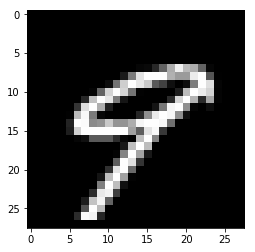

In [12]:
idx = randint(0, 10000-1)
im = test_data[idx]

utils.show(im)

/Users/dongdongdongdong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


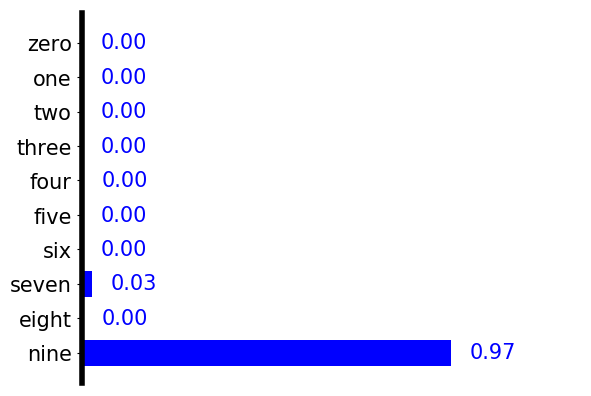

In [13]:
scores = net(im.view(1, -1))
probs = F.softmax(scores)
utils.show_prob_mnist(probs)

In [14]:
test_label[idx]

tensor(9)